In [31]:
# Import Libraries and Dependencies 
import pandas as pd
import numpy as np 
import os
import json
from pathlib import Path
from datetime import datetime, timedelta
from tiingo import TiingoClient
%matplotlib inline

# Bring Env Variables into Python/Store in Variable
tiingo = os.getenv('TIINGO_API_KEY')

# Create a Client to Connect to Tiingo
client = TiingoClient()

# Create Start and End Dates for 1 Year's Worth of Historical Data
end = datetime.now()
start = end + timedelta(-30)

In [32]:
# Create DataFrames for China
us_ticker_df = client.get_dataframe(['SPY','IGM', 'IYE', 'IYM', 'IYH', 'IECS'],
                                            metric_name='close',
                                            startDate= start,
                                            endDate= end,
                                            frequency='daily')
us_df = us_ticker_df.rename(columns={'IGM':'IGM (Technology)', 'IYE':'IYE (Energy)', 'IYM':'IYM (Materials)', 'IYH':'IYH (Healthcare)', 'IECS':'IECS (Consumer Staples)'})
us_df.head()

,SPY,IGM (Technology),IYE (Energy),IYM (Materials),IYH (Healthcare),IECS (Consumer Staples)
2020-01-07 00:00:00+00:00,322.73,246.44,32.49,94.84,215.17,28.2500
2020-01-08 00:00:00+00:00,324.45,248.53,31.91,94.95,216.59,28.3948
2020-01-09 00:00:00+00:00,326.65,250.76,32.10,95.07,217.63,28.5640
2020-01-10 00:00:00+00:00,325.71,250.35,31.90,94.51,217.80,28.5860
2020-01-13 00:00:00+00:00,327.95,253.39,31.92,95.85,216.87,28.8030


In [33]:
# Count/Drop Nulls (if any)
us_df.isnull().sum()

SPY                        0
IGM (Technology)           0
IYE (Energy)               0
IYM (Materials)            0
IYH (Healthcare)           0
IECS (Consumer Staples)    1
dtype: int64

In [34]:
us_df.dropna(inplace=True)
us_df.isnull().sum()

SPY                        0
IGM (Technology)           0
IYE (Energy)               0
IYM (Materials)            0
IYH (Healthcare)           0
IECS (Consumer Staples)    0
dtype: int64

In [35]:
# Calculate the Daily Returns for China Stocks
us_daily_returns = us_df.pct_change()
us_daily_returns.head()

,SPY,IGM (Technology),IYE (Energy),IYM (Materials),IYH (Healthcare),IECS (Consumer Staples)
2020-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08 00:00:00+00:00,0.005330,0.008481,-0.017852,0.001160,0.006599,0.005126
2020-01-09 00:00:00+00:00,0.006781,0.008973,0.005954,0.001264,0.004802,0.005959
2020-01-10 00:00:00+00:00,-0.002878,-0.001635,-0.006231,-0.005890,0.000781,0.000770
2020-01-13 00:00:00+00:00,0.006877,0.012143,0.000627,0.014178,-0.004270,0.007591


In [36]:
# Calculate the Value of Average Daily Returns
#avg_daily_returns_spy = us_daily_returns.mean()['SPY']
avg_daily_returns_igm = us_daily_returns.mean()['IGM (Technology)']
avg_daily_returns_iye = us_daily_returns.mean()['IYE (Energy)']
avg_daily_returns_iym = us_daily_returns.mean()['IYM (Materials)']
avg_daily_returns_iyh = us_daily_returns.mean()['IYH (Healthcare)']
avg_daily_returns_iecs = us_daily_returns.mean()['IECS (Consumer Staples)']

# Calculate the Standard Deviation 
#std_daily_returns_spy = us_daily_returns.std()['SPY']
std_daily_returns_igm = us_daily_returns.std()['IGM (Technology)']
std_daily_returns_iye = us_daily_returns.std()['IYE (Energy)']
std_daily_returns_iym = us_daily_returns.std()['IYM (Materials)']
std_daily_returns_iyh = us_daily_returns.std()['IYH (Healthcare)']
std_daily_returns_iecs = us_daily_returns.std()['IECS (Consumer Staples)']

# Save the Last Day's Closing Price
#spy_last_price = us_df['SPY'][-1]
igm_last_price = us_df['IGM (Technology)'][-1]
iye_last_price = us_df['IYE (Energy)'][-1]
iym_last_price = us_df['IYM (Materials)'][-1]
iyh_last_price = us_df['IYH (Healthcare)'][-1]
iecs_last_price = us_df['IECS (Consumer Staples)'][-1]

In [37]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252
monte_carlo = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [38]:
# Run the Monte Carlo Simulation
for x in range (number_simulations):
    #simulated_spy_prices = [spy_last_price]
    simulated_igm_prices = [igm_last_price]
    simulated_iye_prices = [iye_last_price]
    simulated_iym_prices = [iym_last_price]
    simulated_iyh_prices = [iyh_last_price]
    simulated_iecs_prices = [iecs_last_price]
    
    for y in range (number_records):
        #simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_returns_spy, std_daily_returns_spy))
        simulated_igm_price = simulated_igm_prices[-1] * (1 + np.random.normal(avg_daily_returns_igm, std_daily_returns_igm))
        simulated_iye_price = simulated_iye_prices[-1] * (1 + np.random.normal(avg_daily_returns_iye, std_daily_returns_iye))
        simulated_iym_price = simulated_iym_prices[-1] * (1 + np.random.normal(avg_daily_returns_iym, std_daily_returns_iym))
        simulated_iyh_price = simulated_iyh_prices[-1] * (1 + np.random.normal(avg_daily_returns_iyh, std_daily_returns_iyh))
        simulated_iecs_price = simulated_iecs_prices[-1] * (1 + np.random.normal(avg_daily_returns_iecs, std_daily_returns_iecs))
       
        #simulated_spy_prices.append(simulated_spy_price)
        simulated_igm_prices.append(simulated_igm_price)
        simulated_iye_prices.append(simulated_iye_price)
        simulated_iym_prices.append(simulated_iym_price)
        simulated_iyh_prices.append(simulated_iyh_price)
        simulated_iecs_prices.append(simulated_iecs_price)
    
    #monte_carlo['SPY prices'] = pd.Series(simulated_spy_prices)
    monte_carlo['IGM (Technology) prices'] = pd.Series(simulated_igm_prices)
    monte_carlo['IYE (Energy) prices'] = pd.Series(simulated_iye_prices)
    monte_carlo['IYM (Materials) prices'] = pd.Series(simulated_iym_prices)
    monte_carlo['IYH (Healthcare) prices'] = pd.Series(simulated_iyh_prices)
    monte_carlo['IECS (Consumer Staples) prices'] = pd.Series(simulated_iecs_prices)
    
    simulated_us_daily_returns = monte_carlo.pct_change()
    
    weights = [0.2, 0.2, 0.2, 0.2, 0.2]
    us_portfolio_daily_returns = simulated_us_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[x] = (1 + us_portfolio_daily_returns.fillna(0)).cumprod() - 1
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.005980,0.007871,-0.005798,0.003745,-0.008962,0.004452,0.004461,-0.005184,-0.004191,-0.004258,...,0.001452,-0.000636,-0.003420,0.000869,0.001868,-0.003342,0.003723,0.001353,-0.004607,0.000097
2,0.001253,0.000166,-0.003616,-0.003286,-0.003488,0.011668,0.006850,-0.011332,0.006209,0.003845,...,-0.001944,0.004490,-0.003318,-0.003877,0.010176,0.004119,0.001999,0.001628,-0.006049,-0.005086
3,0.008988,-0.001947,0.000062,-0.005616,0.000531,0.005817,0.006447,-0.008779,0.000023,0.000480,...,-0.008925,0.010929,0.000102,-0.001990,0.006795,0.012441,-0.001727,0.003900,0.002987,0.002386
4,0.002152,0.003689,0.001441,-0.002583,0.004193,0.007370,0.001429,-0.012102,-0.000187,0.003603,...,-0.002198,0.011418,-0.003983,-0.004826,0.016081,0.017424,-0.005881,0.005323,-0.002659,-0.000328


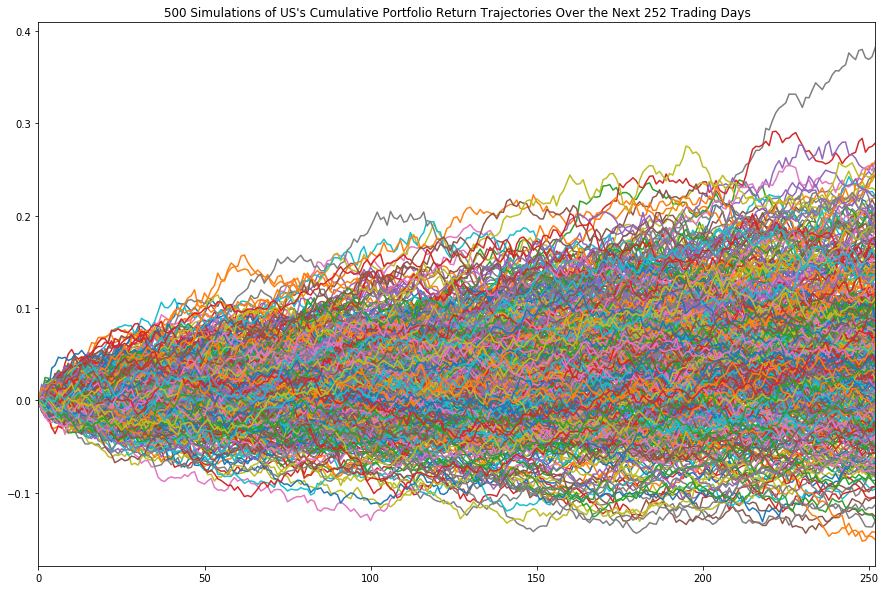

In [39]:
# Visualize the Simulation
plot_title = f"{number_simulations} Simulations of US's Cumulative Portfolio Return Trajectories Over the Next {number_records} Trading Days"
portfolio_cumulative_returns.plot(legend=None, title=plot_title, figsize=(15,10))